# 使用Pandas更好的做数据科学

### 作者: Kevin Markham

- GitHub: https://github.com/justmarkham
- YouTube: https://www.youtube.com/dataschool

全部下来大概一个小时时间

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#需要声明，才能在notebook中画图
%matplotlib inline

#我们从中下载的是罗德岛的警务数据，这里以ri代表罗德岛警务数据
df = pd.read_csv('data/police.csv')

#查看前5条数据
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


object实际上就是字符串类，float64是浮点型数值类，bool是布尔值（True， False）

## 移除某列
county_name这一列全部为空值，所以我们想移除该列。

In [3]:
#inplace默认为False。当inplace=True是指对原始数据进行操作
#写法等同于ri.drop('county_name', axis=1 , inplace=True)
df.drop('county_name', axis='columns', inplace=True)

In [4]:
#另外一种对含有空值的列进行移除的方法
print(df.shape)

(91741, 14)


## pandas的过滤功能
保留满足布尔值为真的数据，这里我们保留violation列值为Speeding的数据，展示前5行

In [5]:
df[df.violation == 'Speeding'].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


男女驾驶员超速违规方面的信息

## value_counts方法

In [113]:
#超速违规的驾驶员中男女各多少人
print(df[df.violation == 'Speeding'].driver_gender.value_counts())

#超速违规的驾驶员中男女占比
print(df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True))

M    32979
F    15482
Name: driver_gender, dtype: int64
M    0.680527
F    0.319473
Name: driver_gender, dtype: float64


## groupby方法
查看不同driver_gender中，violation各种值的分布占比

In [6]:
df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

## mean方法
mean方法居然可以默认计算占比

In [7]:
#True为执行搜查，False为未执行搜查
print(df.search_conducted.value_counts(normalize=True))

print('\n')

# 在这里mean可以计算出True的占比
print(df.search_conducted.mean())

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64


0.03483720473942948


现在可以证明性别影响搜查吗？

## value_counts方法中的dropna参数默认为True

In [8]:
#为什么返回的是空序列？
df[df.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [9]:
#原来是value_counts方法的默认dropna=True。现在将其设置为False
df[df.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

小节:

- pandas的方法默认会将忽略空值，即dropna=True

## str方法
通过str方法我们可以对字符串进行判断是否含有某字符串

In [10]:
# 查看搜查类型
df.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Inventory,

In [11]:
# 将search_type列str后，检查是否含有Protective Frisk字符
df['frisk'] = df.search_type.str.contains('Protective Frisk')

In [12]:
df.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

小节:

- dataframe含有字符串方法，可以查看是否含有某字符串


## pd.to_datetime函数
将日期字符串转化为datetime类，可以使用datetime类的方法进行日期计算和操作

In [13]:
#将ri.stop_date转化为datetime的格式的dataframe，存到stop_datetime新列中
df['stop_datetime'] = pd.to_datetime(df.stop_date)

#注意这里有dt方法，类似于上面的str方法
#dt后可以使用year、month等方法
df.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [142]:
#统计月份
df.stop_datetime.dt.month.value_counts()

1     8479
5     7935
11    7877
10    7745
3     7742
6     7630
8     7615
7     7568
4     7529
9     7427
12    7152
2     7042
Name: stop_datetime, dtype: int64

小节:

- 使用datetime类，可以操作时间和日期

## 对时间序列数据绘图

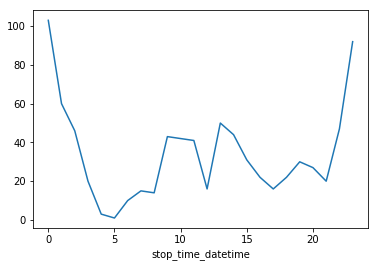

In [147]:
# 绘制drugs_related_stop时间序列
df['stop_time_datetime'] = pd.to_datetime(ri.stop_time)
df.groupby(df.stop_time_datetime.dt.hour).drugs_related_stop.sum().plot()

## map方法

Series的map方法可以接受一个函数或含有映射关系的字典型对象。 对某一个列进行批操作，本文中是批量替换

In [148]:
# 将0-15 Min换成8
# 16-30 Min换成23
# 30+ Min 换成45
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

#记得这不是原地操作原始数据，需要新建一列存储map后的结果
ri['stop_minutes'] = ri.stop_duration.map(mapping)

#随机查看5条数据
ri['stop_minutes'].sample(5)

65959    23.0
32851     NaN
2645      8.0
71446     8.0
62275    23.0
Name: stop_minutes, dtype: float64

## agg方法
使用某种方法如mean、count对某类数据进行操作。

过去agg只能groupby之后的数据进行操作，现在还可以对dataframe类、series类进行操作。

In [14]:
#计算ri均值和个数
df.agg(['mean', 'count'])

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
count,91741.0,91741.0,86406.0,86414.000000,86120.000000,86408.0,86408.0,86408.0,91741.000000,3196.0,86408.0,86408.000000,86408.0,91741.000000,3196.000000,91741.0
mean,NaN,NaN,NaN,1970.491228,34.011333,NaN,NaN,NaN,0.034837,NaN,NaN,0.033897,NaN,0.008884,0.085732,NaN


In [21]:
#对某一列进行均值和计数
df.search_conducted.agg(['mean', 'count'])

mean         0.034837
count    91741.000000
Name: search_conducted, dtype: float64

In [22]:
#对groupby之后的数据进行均值和计算计算
df.groupby('violation_raw').search_conducted.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,0.253165,79
Call for Service,0.083975,1298
Equipment/Inspection Violation,0.063884,11020
Motorist Assist/Courtesy,0.068966,203
Other Traffic Violation,0.055165,16224
Registration Violation,0.097319,3432
Seatbelt Violation,0.032520,2952
Special Detail/Directed Patrol,0.010591,2455
Speeding,0.019747,48463


## plot方法
画图

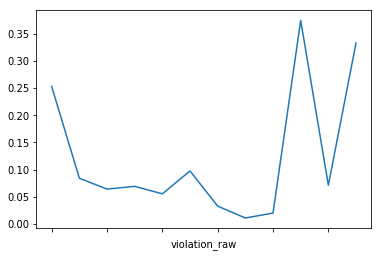

In [23]:
#默认是折线图
ri.groupby('violation_raw').search_conducted.mean().plot()

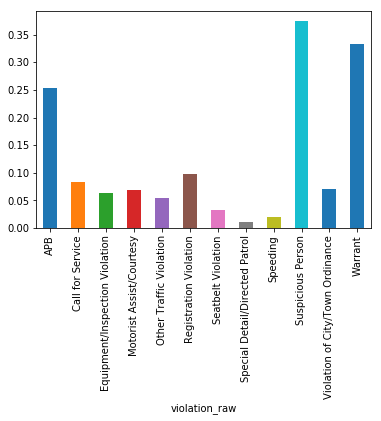

In [24]:
#换成bar图
ri.groupby('violation_raw').search_conducted.mean().plot(kind='bar')

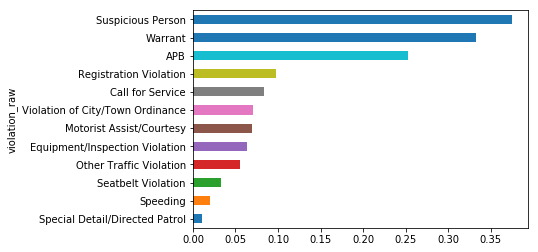

In [25]:
#看着费劲，转化为水平bar图
ri.groupby('violation_raw').search_conducted.mean().sort_values().plot(kind='barh')